# Importing packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Loading the dataset


In [2]:
df = pd.read_csv('./Crop_recommendation.csv')

# Analyzing imported data


In [3]:
df #show the complete data set

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [4]:
print("Shape of the dataframe: ",df.shape) #number of rows and columes
df.isna().sum() #detect presence of a missing value in each column

Shape of the dataframe:  (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info() #gives information about the num of non null cols, data type in each col and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Summary Statistics

In [6]:
df.describe() #caluculates the count, mean, standard deviation, min and max values and percentals of each col or attribute

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [7]:
df.dtypes #shows the datatypes of the various cols

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# Exploratory Data Analysis

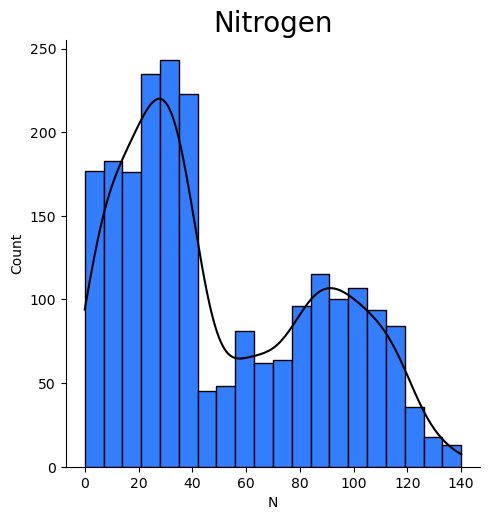

In [8]:
#getting the data visualization of the col nitrogen using seabon function displot
sns.displot(x=df['N'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#337dff')
plt.title("Nitrogen",size=20)
plt.show()

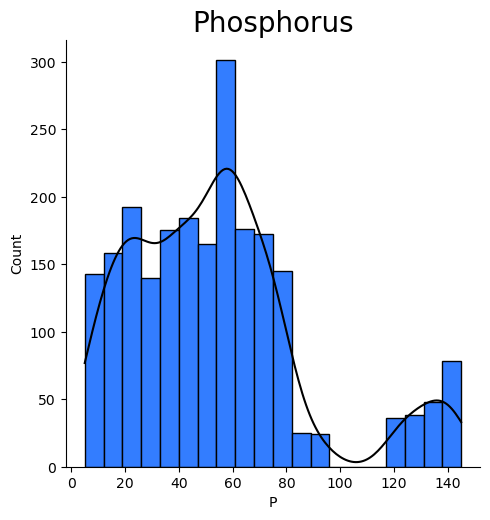

In [9]:
sns.displot(x=df['P'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#337dff')
plt.title("Phosphorus", size=20)
plt.xticks(range(0,150,20))
plt.show()

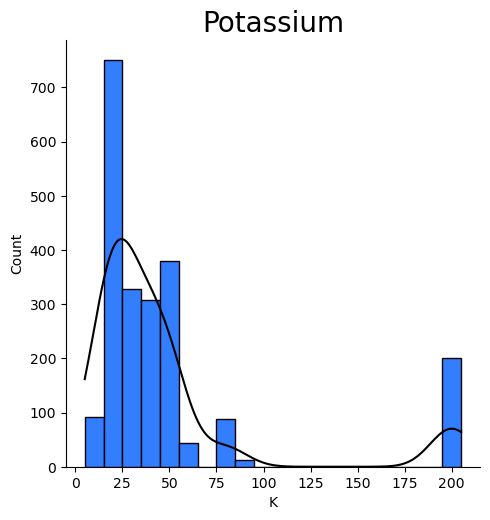

In [10]:
sns.displot(x=df['K'],kde=True, bins=20, facecolor='#337DFF',edgecolor='black', color='black')
plt.title("Potassium",size=20)
plt.show()

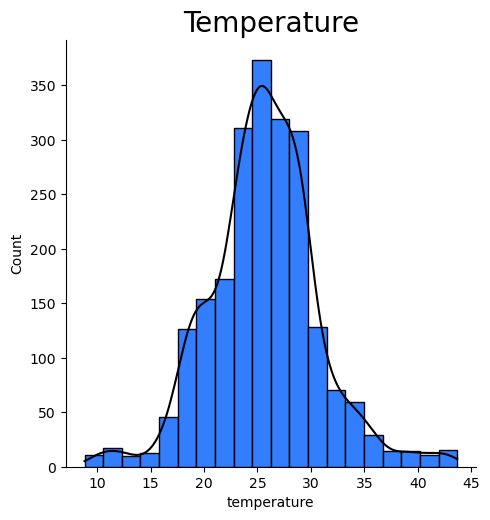

In [11]:
sns.displot(x=df['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#337DFF')
plt.title("Temperature",size=20)
plt.show()

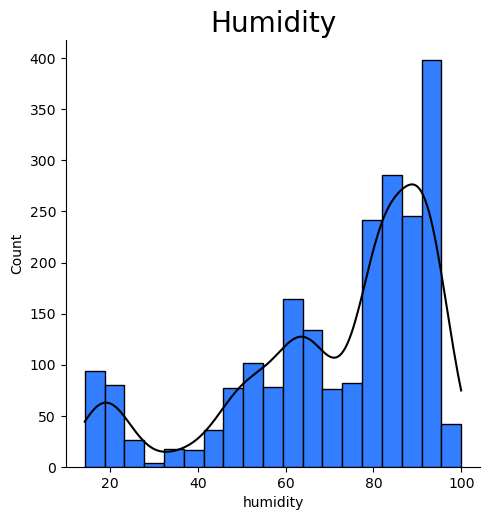

In [12]:
sns.displot(x=df['humidity'], color='black',facecolor='#337DFF',kde=True,edgecolor='black')
plt.title("Humidity",size=20)
plt.show()

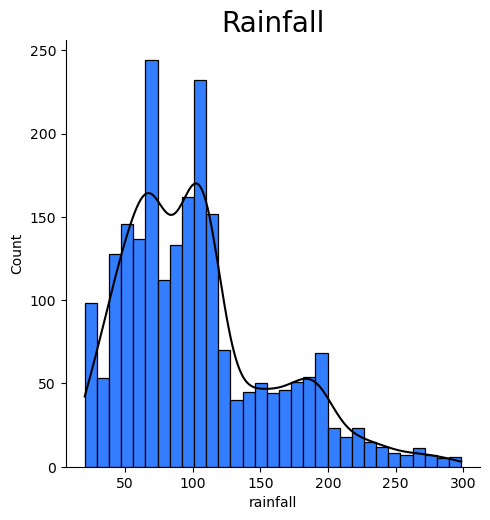

In [13]:
sns.displot(x=df['rainfall'], color='black',facecolor='#337DFF',kde=True,edgecolor='black')
plt.title("Rainfall",size=20)
plt.show()

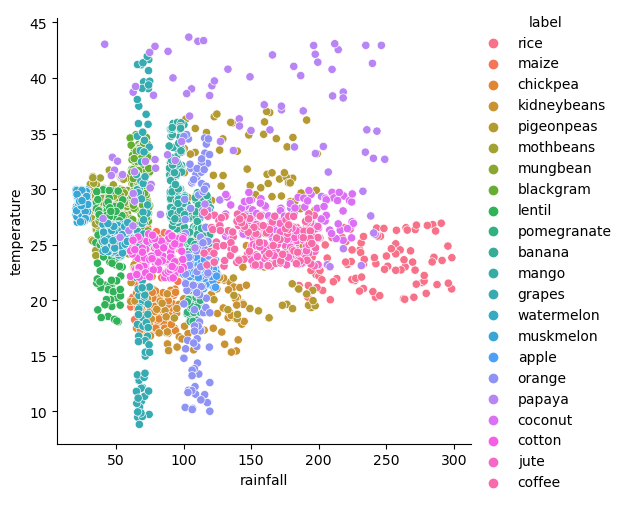

In [14]:
#plotting the effect of temperature and rainfall on all the crops
sns.relplot(x='rainfall',y='temperature',data=df, kind='scatter', hue='label', height=5)
plt.show()

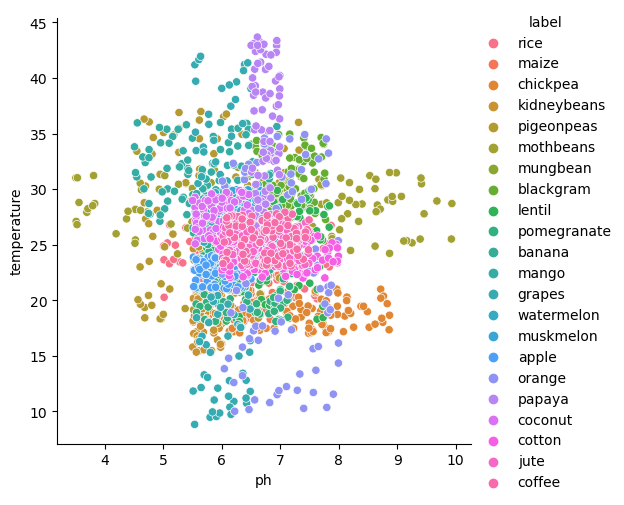

In [15]:
#plotting the effect of ph and temperatureq on all the crops
sns.relplot(x='ph',y='temperature',data=df, kind='scatter', hue='label', height=5)
plt.show()

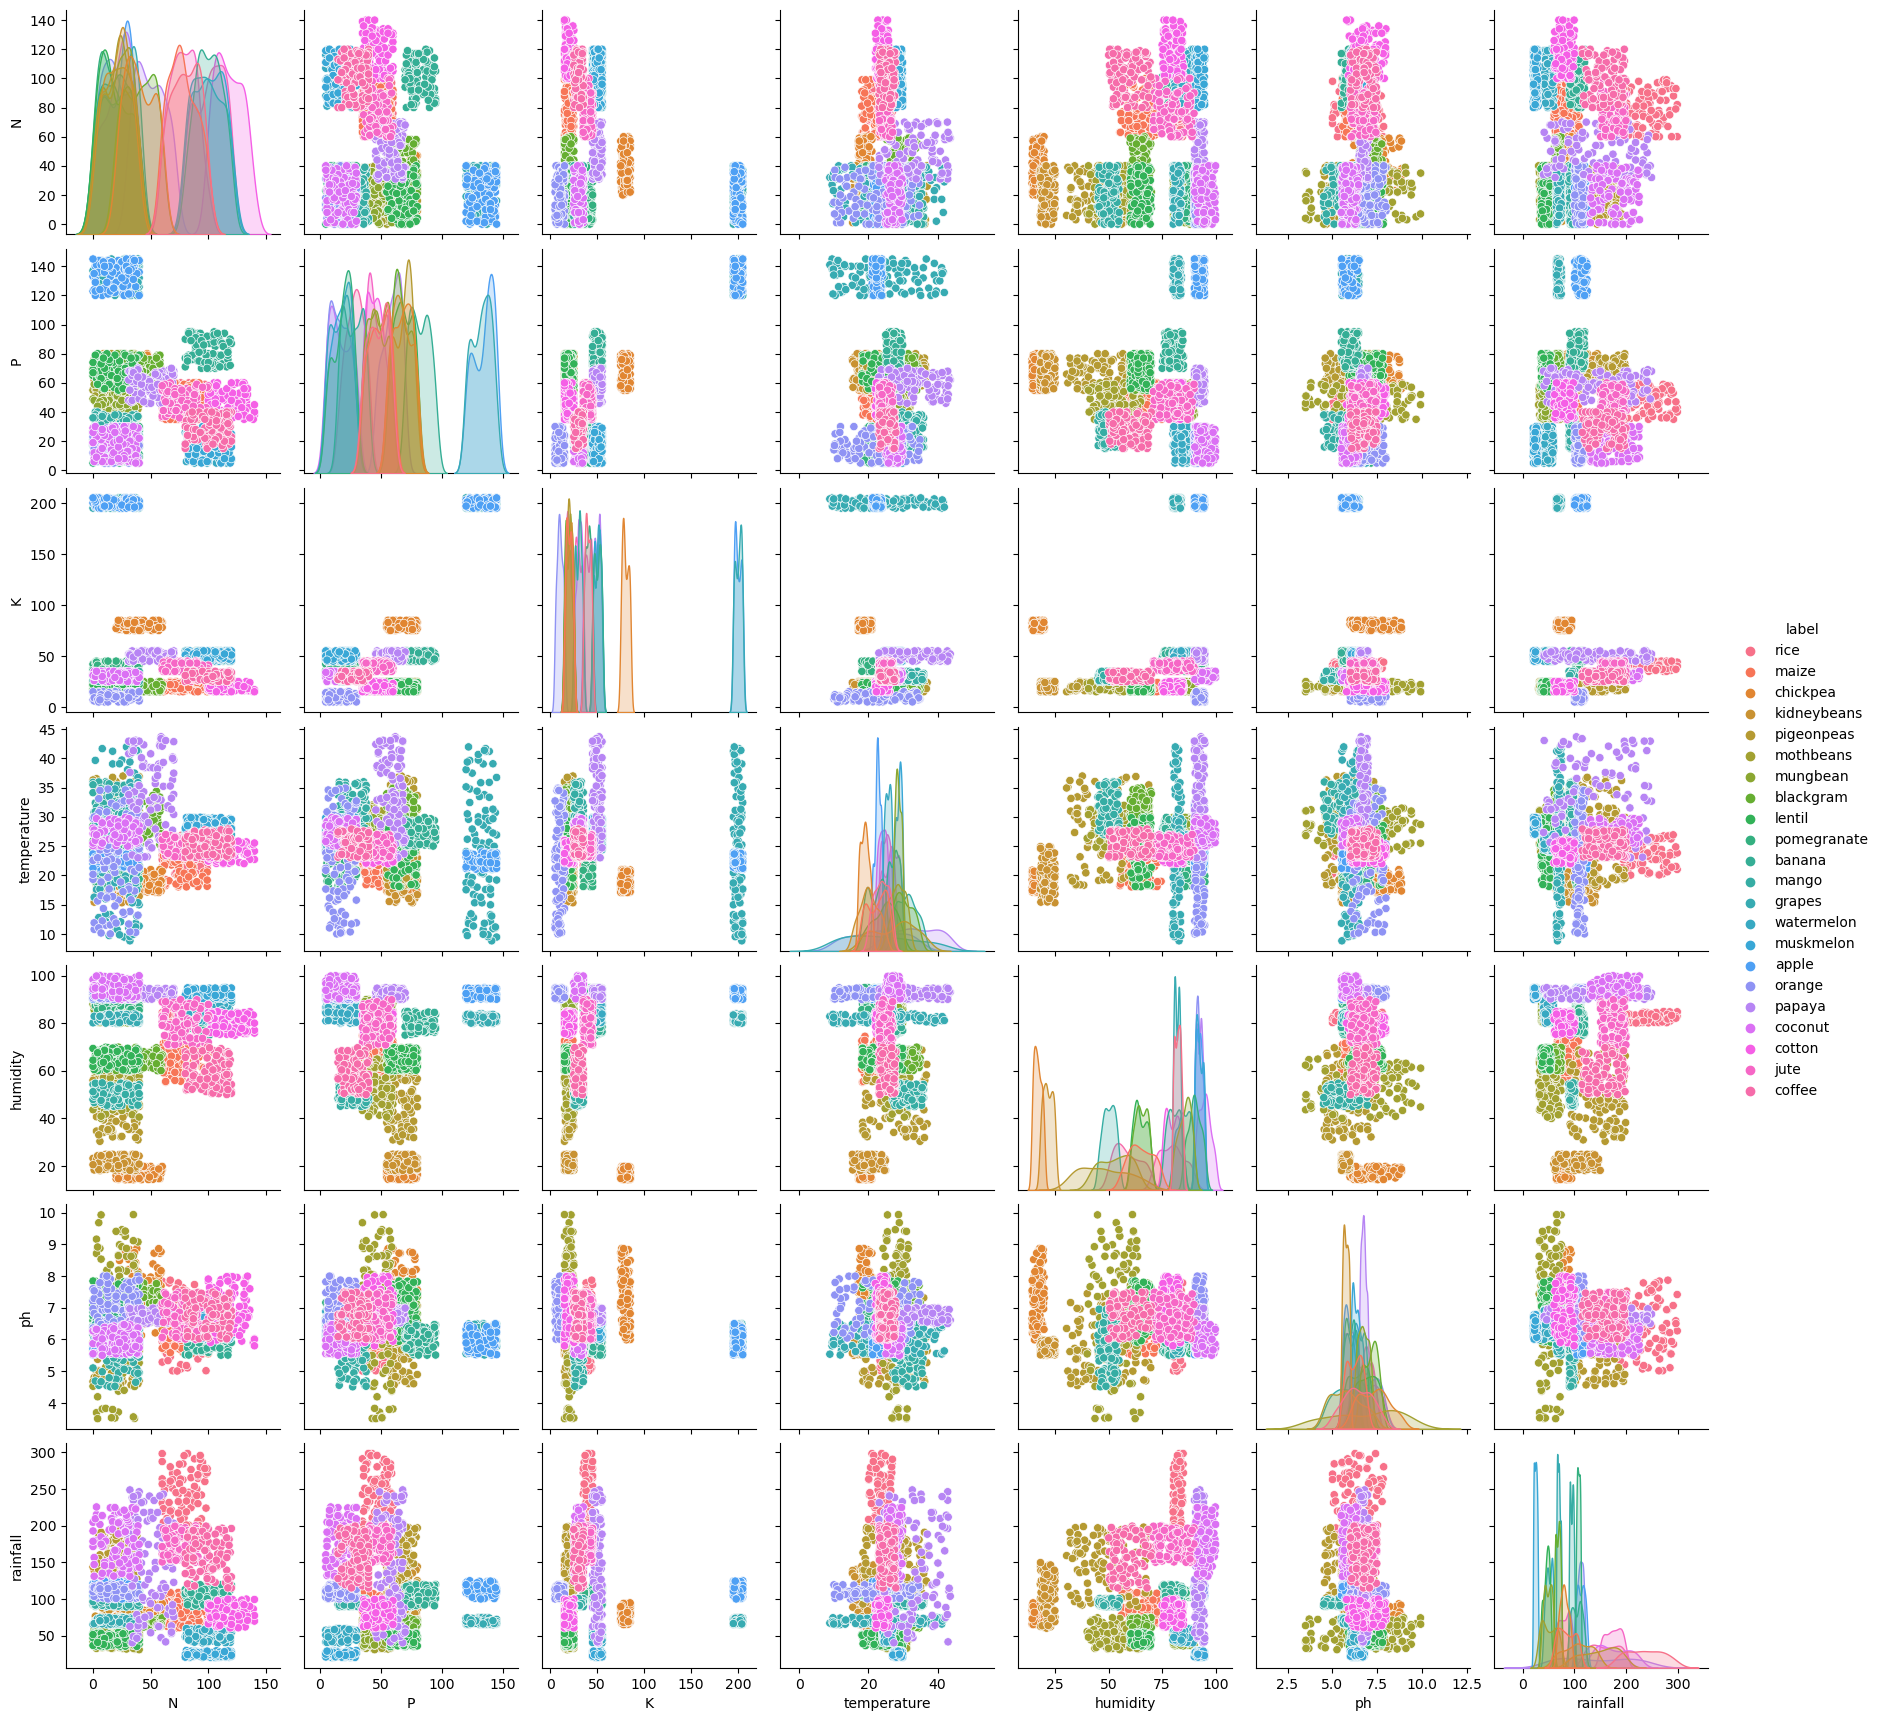

In [16]:
#using pair plot to show the relationship between pairs of attributes 
sns.pairplot(data=df,hue='label')
plt.show()

In [17]:
# Unique values in the label column
crops = df['label'].unique() #get us the different or unique crops
print(crops)
# print(len(crops)) #print the total size
# print(crops) #print the crops
print(pd.value_counts(df['label'])) #for each unique crop count the number of  data we got on that crop

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [18]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in crops:
    df2.append(df[df['label'] == i]) #i.e making a list that contain unique crops in different list
df2[20].head() #printing the first 5 list of the second set of crop

N   P   K  temperature   humidity        ph    rainfall label
2000  89  47  38    25.524690  72.248508  6.002525  151.886997  jute
2001  60  37  39    26.591050  82.941641  6.033485  161.247000  jute
2002  63  41  45    25.297818  86.887054  7.121934  196.624951  jute
2003  86  40  39    25.721009  88.165136  6.207460  175.608670  jute
2004  96  41  40    23.584193  72.004608  6.090060  190.424216  jute

In [19]:
df.duplicated().any() #checking for duplicate

False

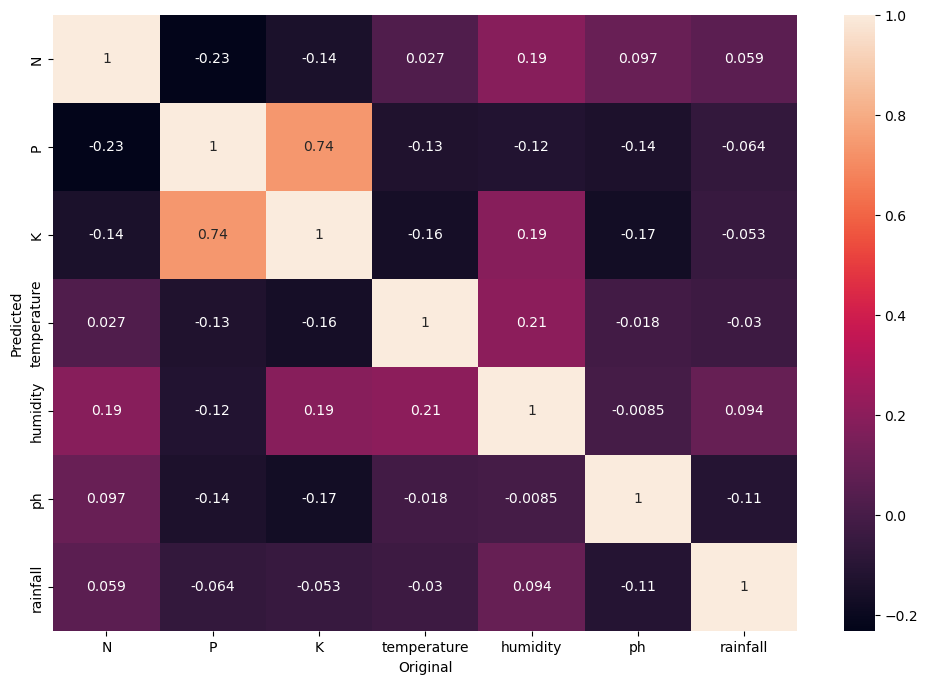

In [20]:
#expected heatmap when we run the data colums against themselves
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(df.corr(),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

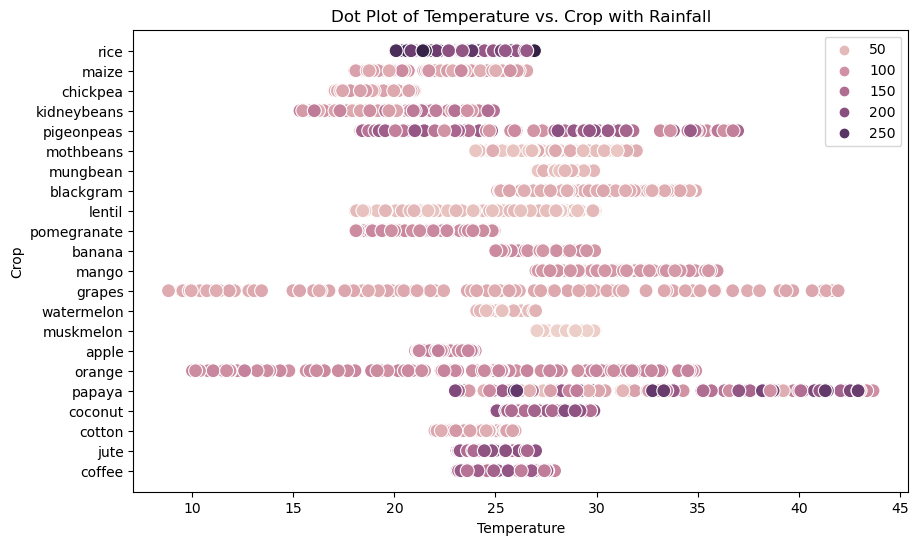

In [21]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='label', hue='rainfall', s=100)

plt.title('Dot Plot of Temperature vs. Crop with Rainfall')
plt.xlabel('Temperature')
plt.ylabel('Crop')
plt.legend()

plt.show()

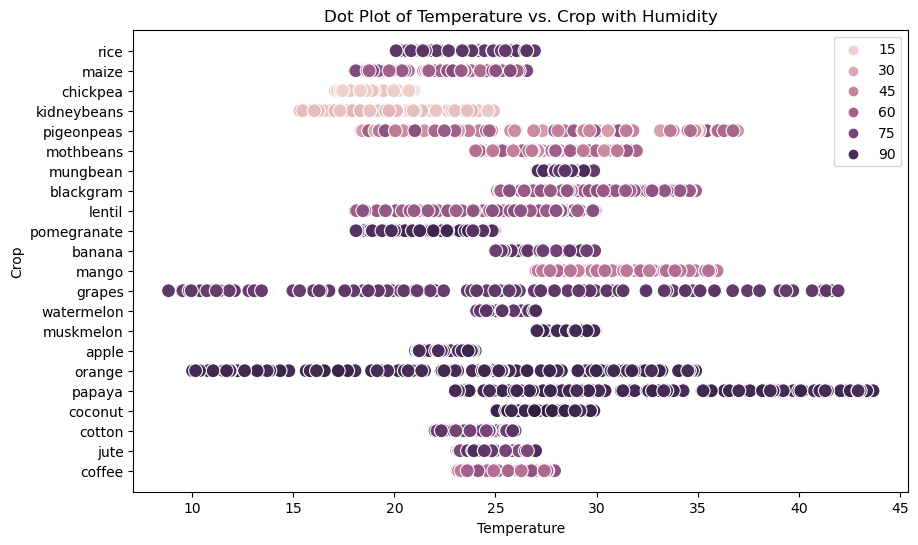

In [22]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='label', hue='humidity', s=100)

plt.title('Dot Plot of Temperature vs. Crop with Humidity')
plt.xlabel('Temperature')
plt.ylabel('Crop')
plt.legend()

plt.show()

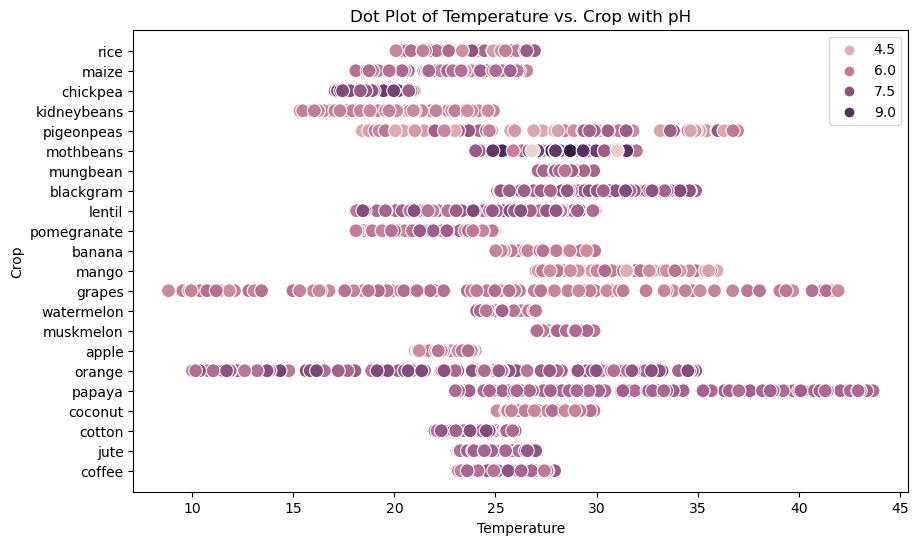

In [23]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='label', hue='ph', s=100)

plt.title('Dot Plot of Temperature vs. Crop with pH')
plt.xlabel('Temperature')
plt.ylabel('Crop')
plt.legend()

plt.show()

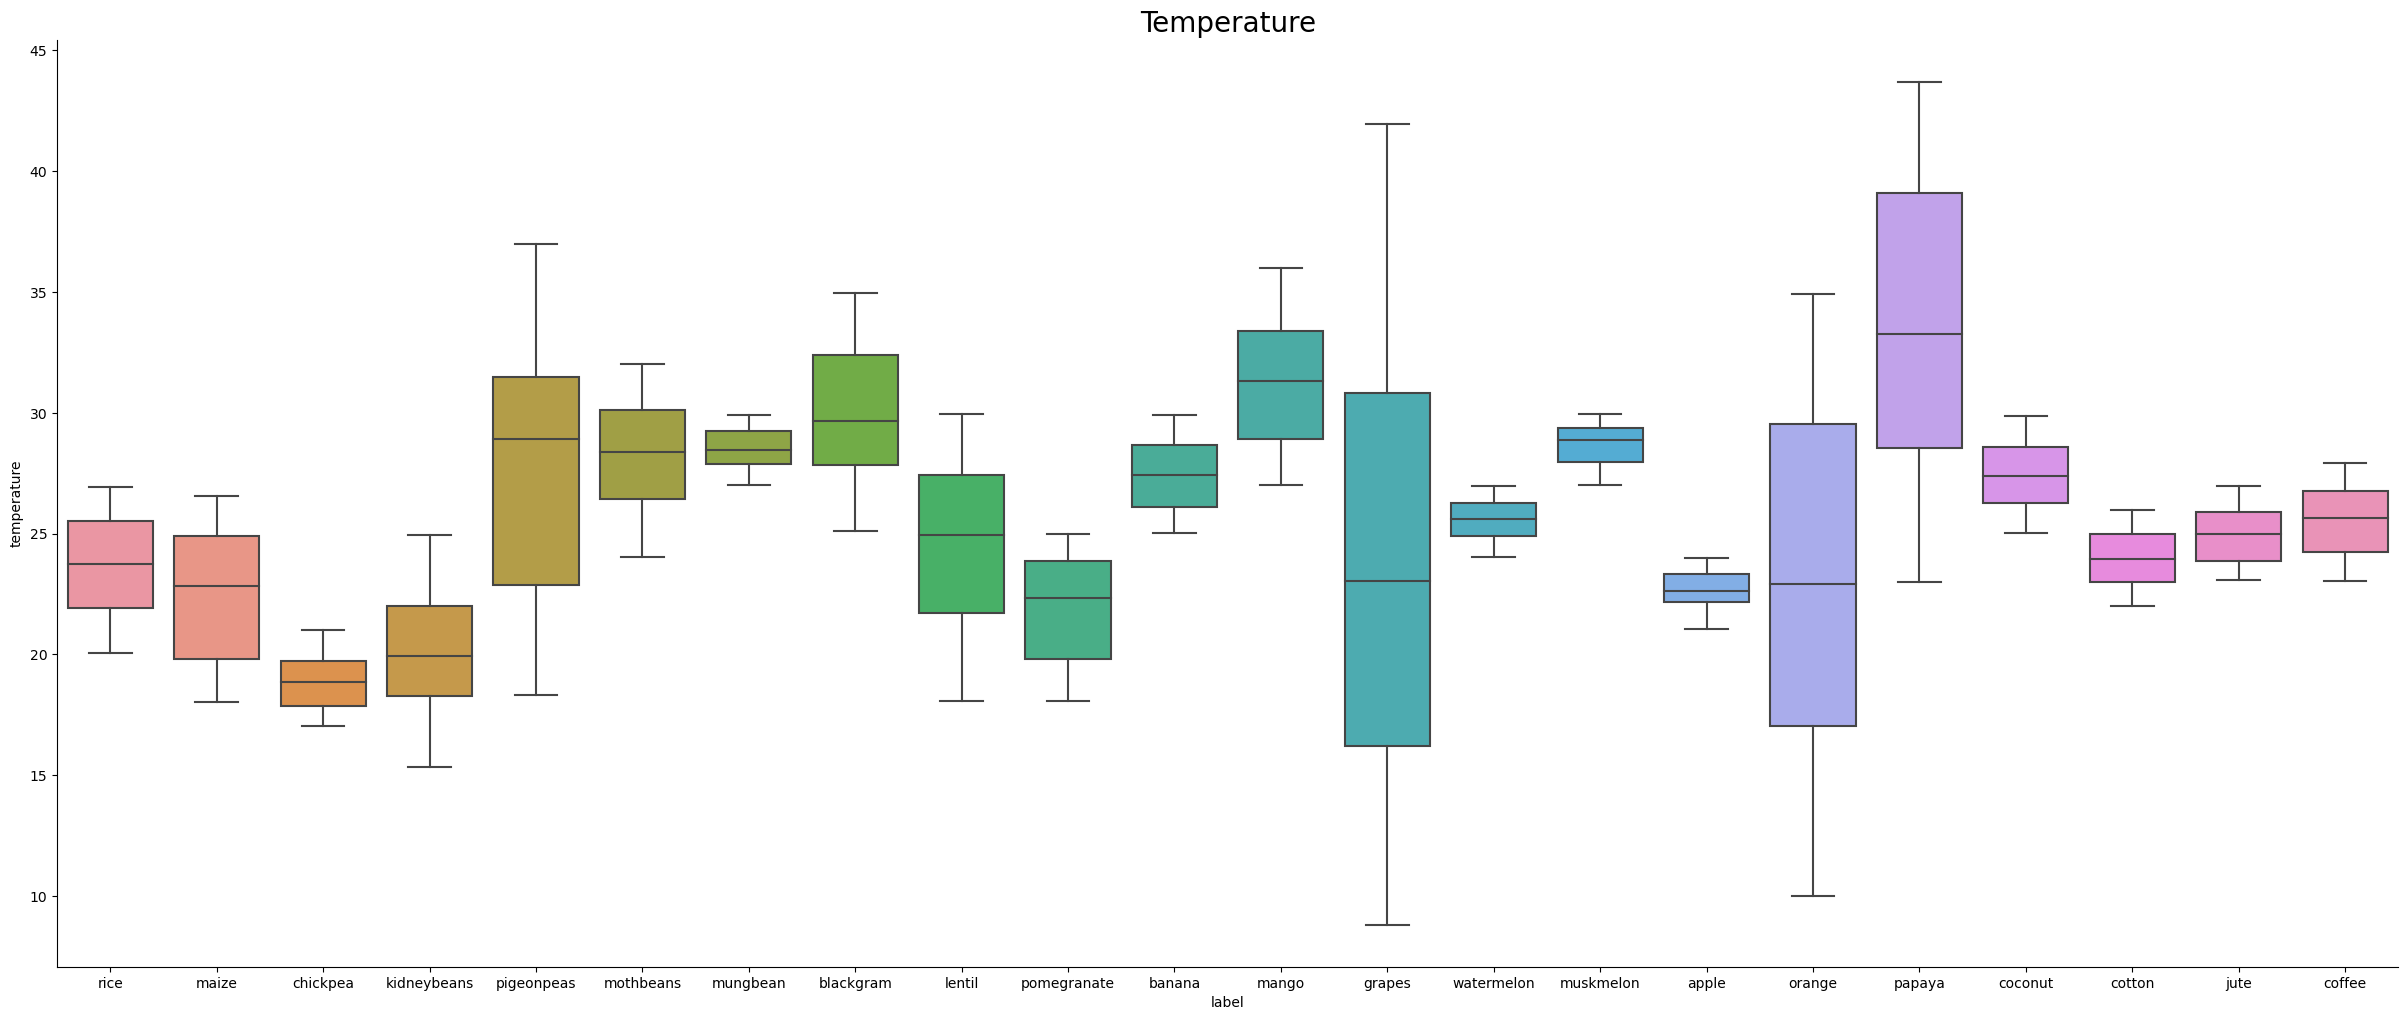

In [24]:
#how crops responds to varied temperatures using box plot to visualize the min, max, lower, median, upper quartiles
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

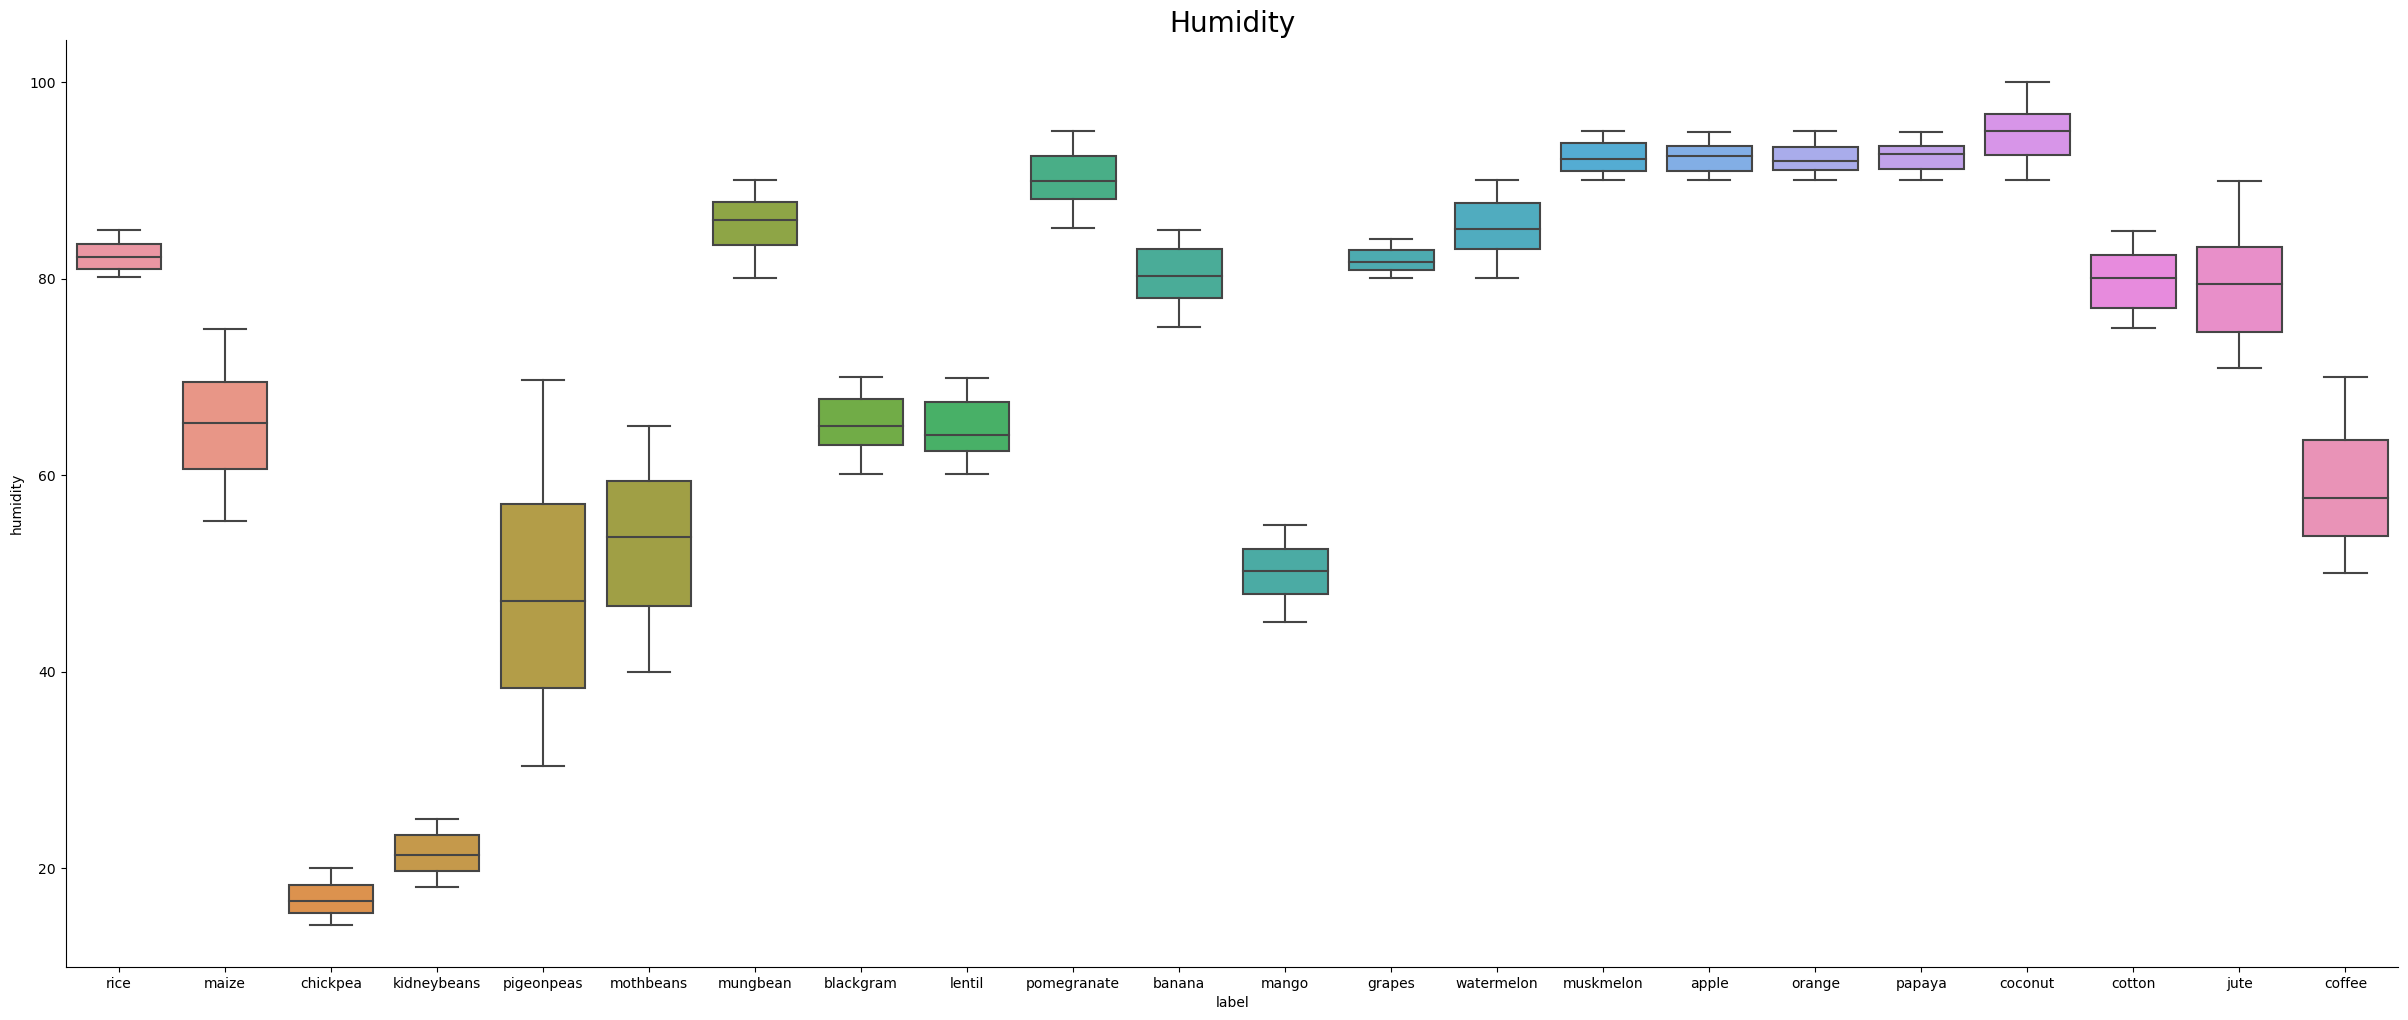

In [25]:
#box plot of how the crops respond to humidity
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

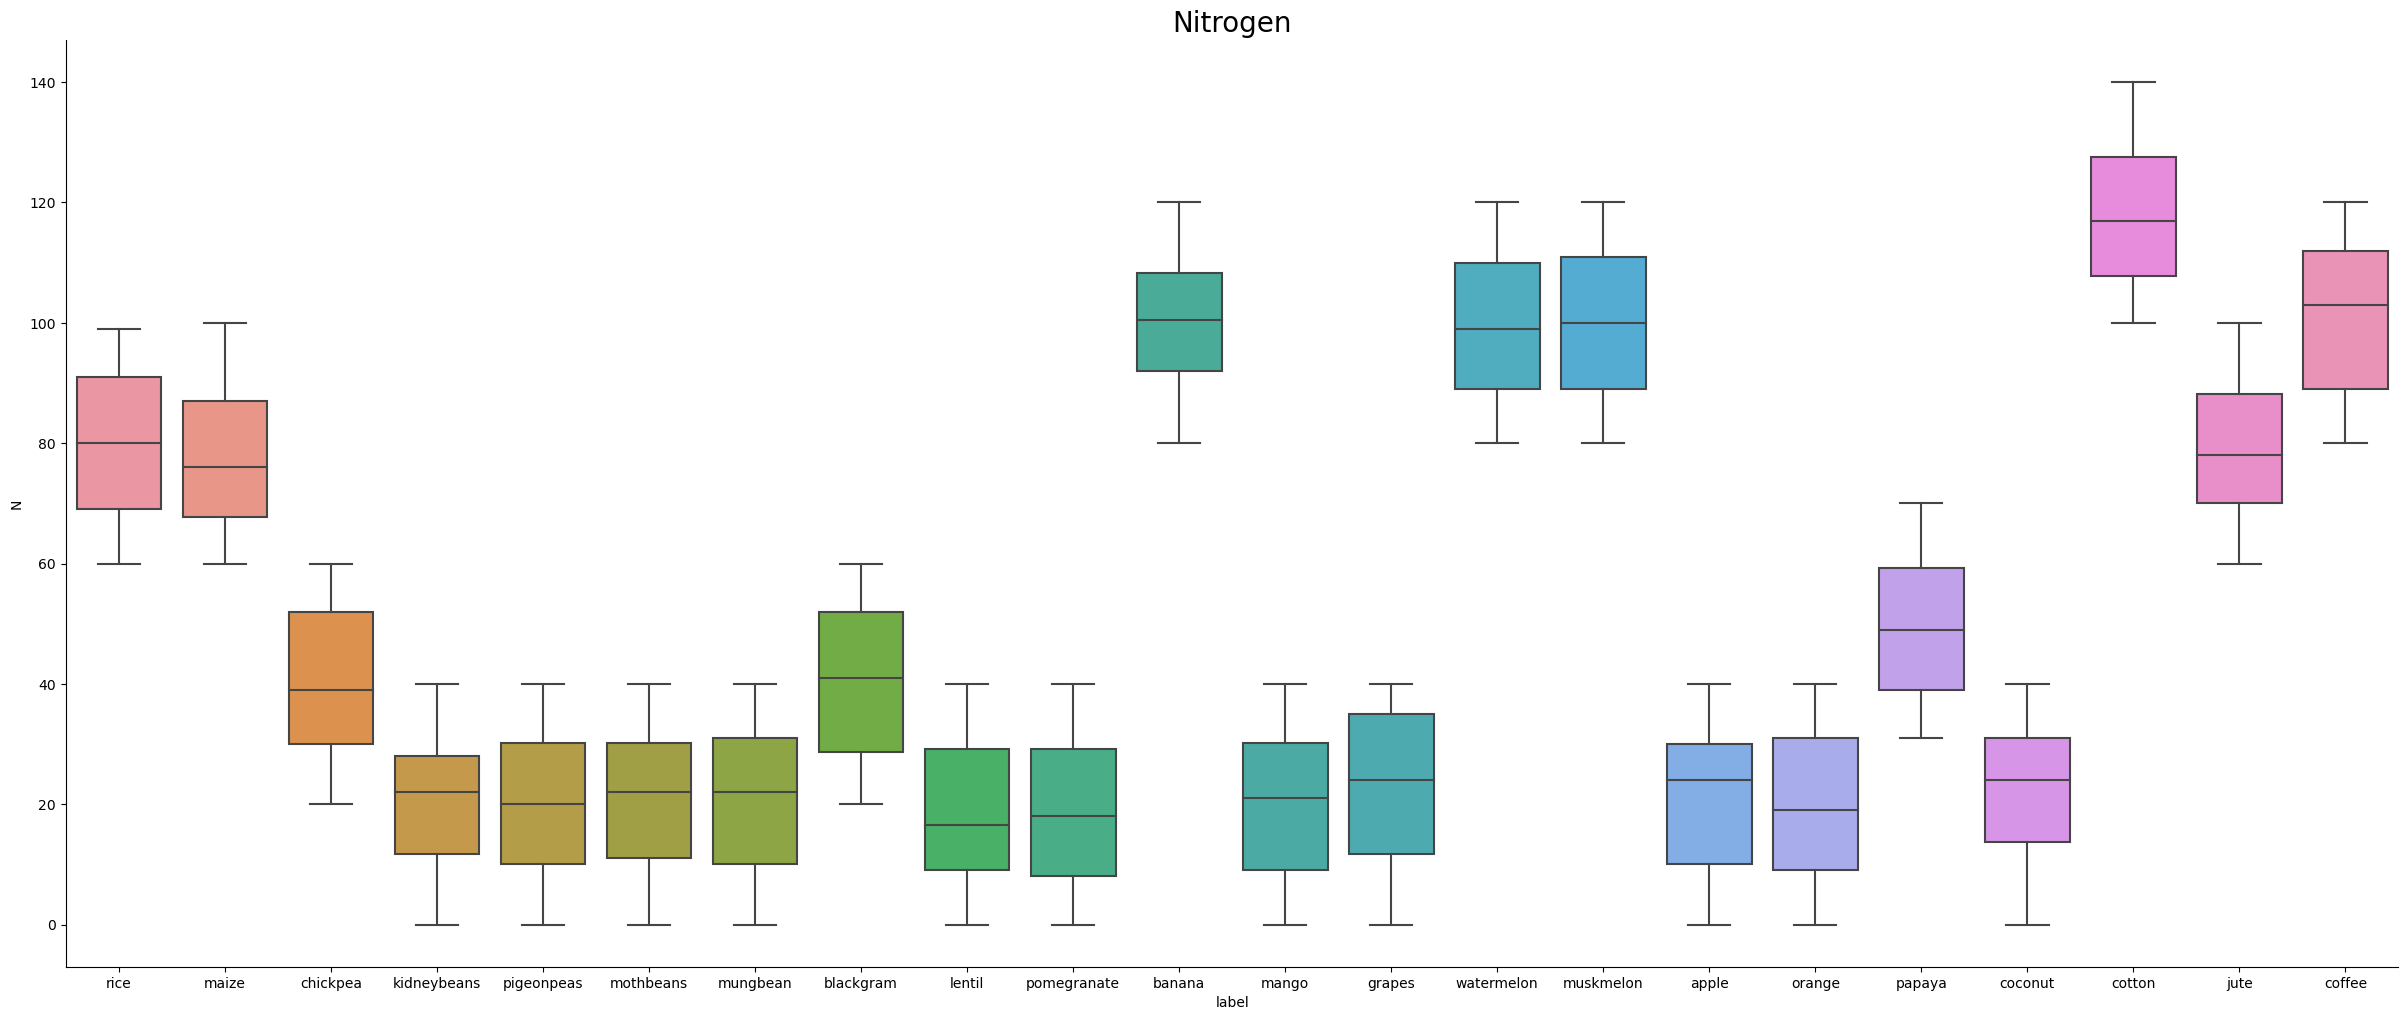

In [26]:
#visuals of how the crops responded to Nitrogen
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27)
plt.title("Nitrogen", size=20)
# plt.xticks(rotation='vertical')
plt.show()

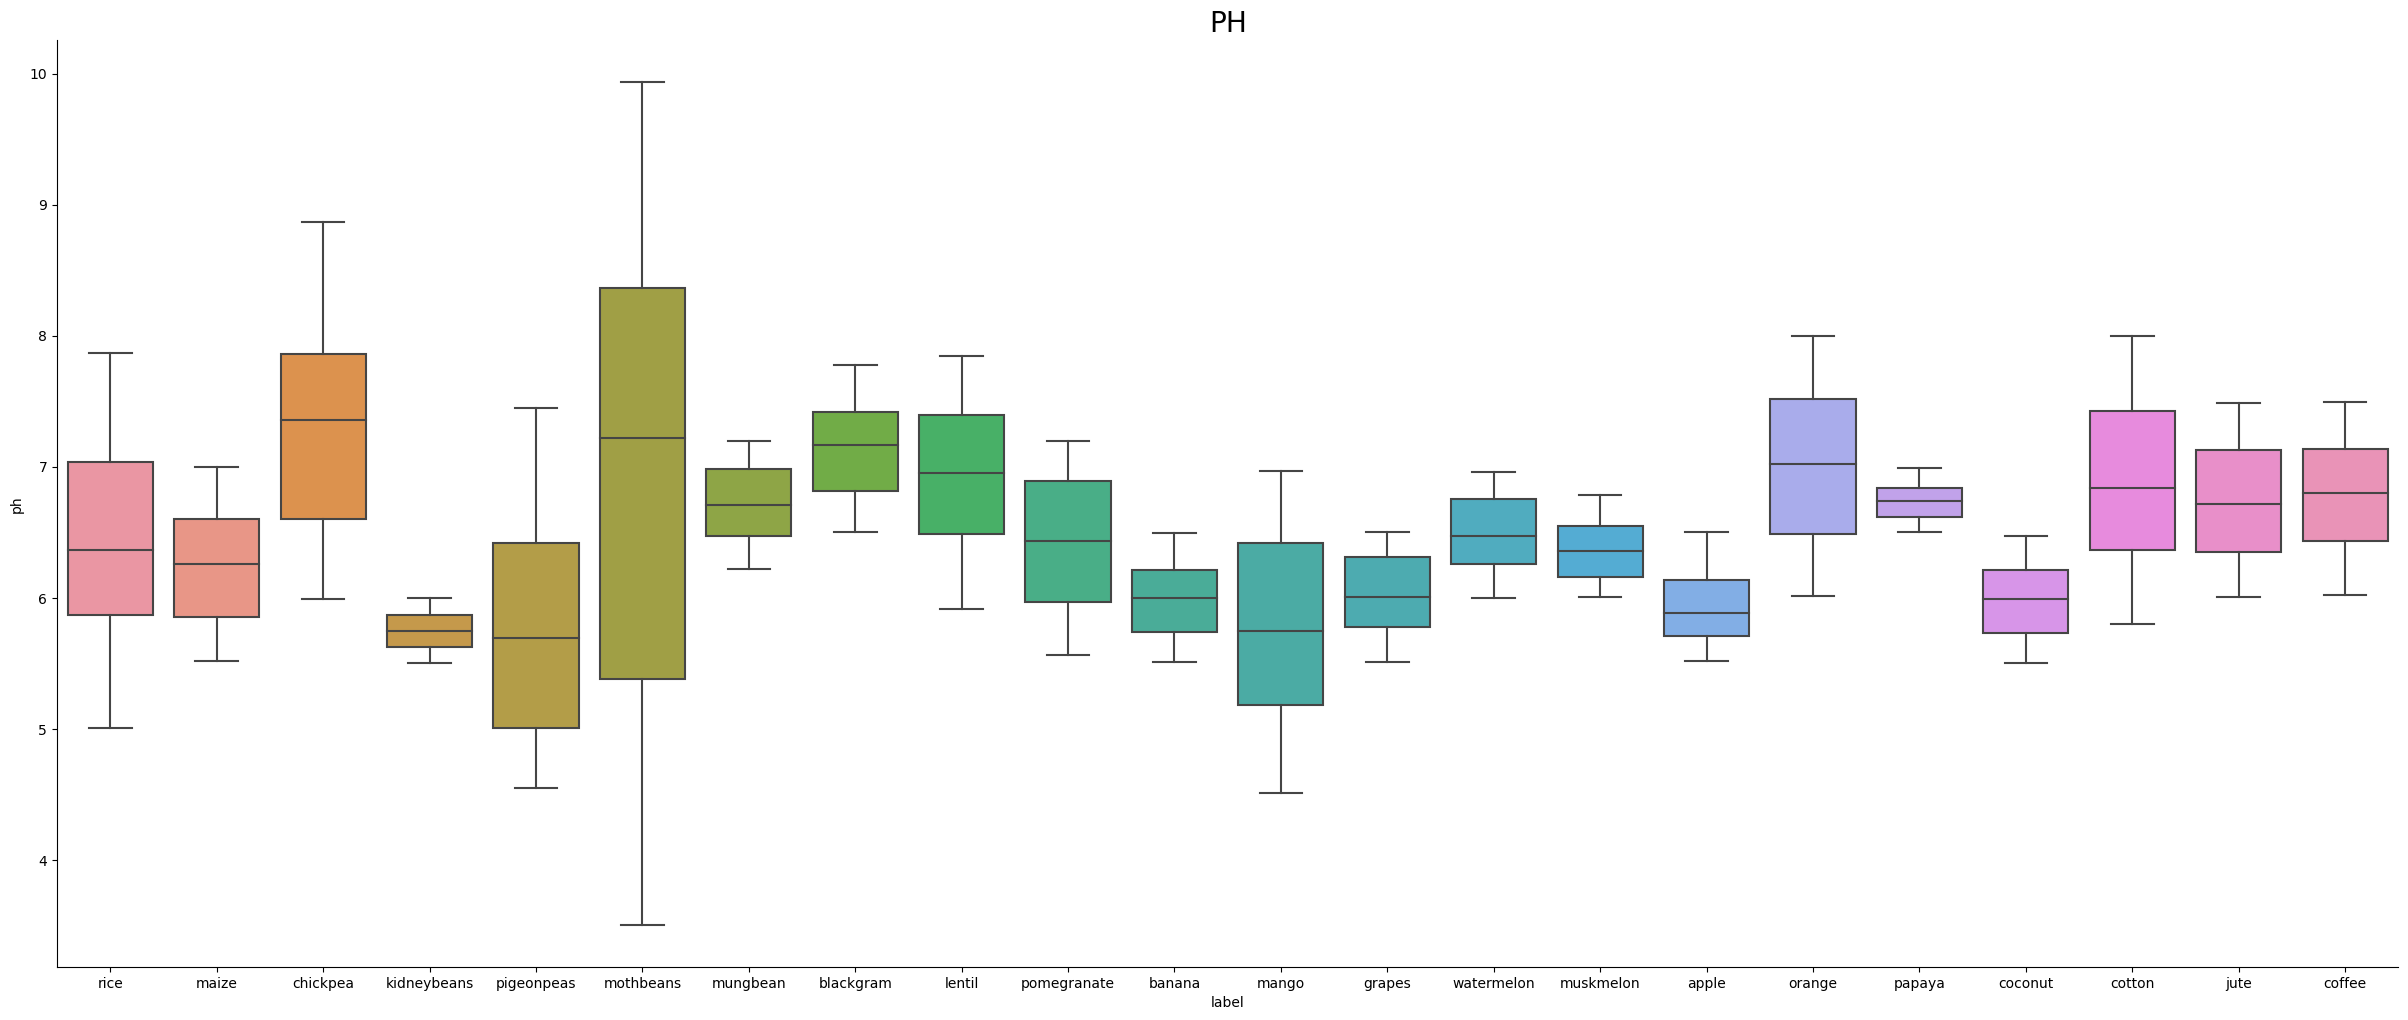

In [27]:
#How the crops responded to sality of the soil (PH)
sns.catplot(data=df, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("PH",size=20)
plt.show()

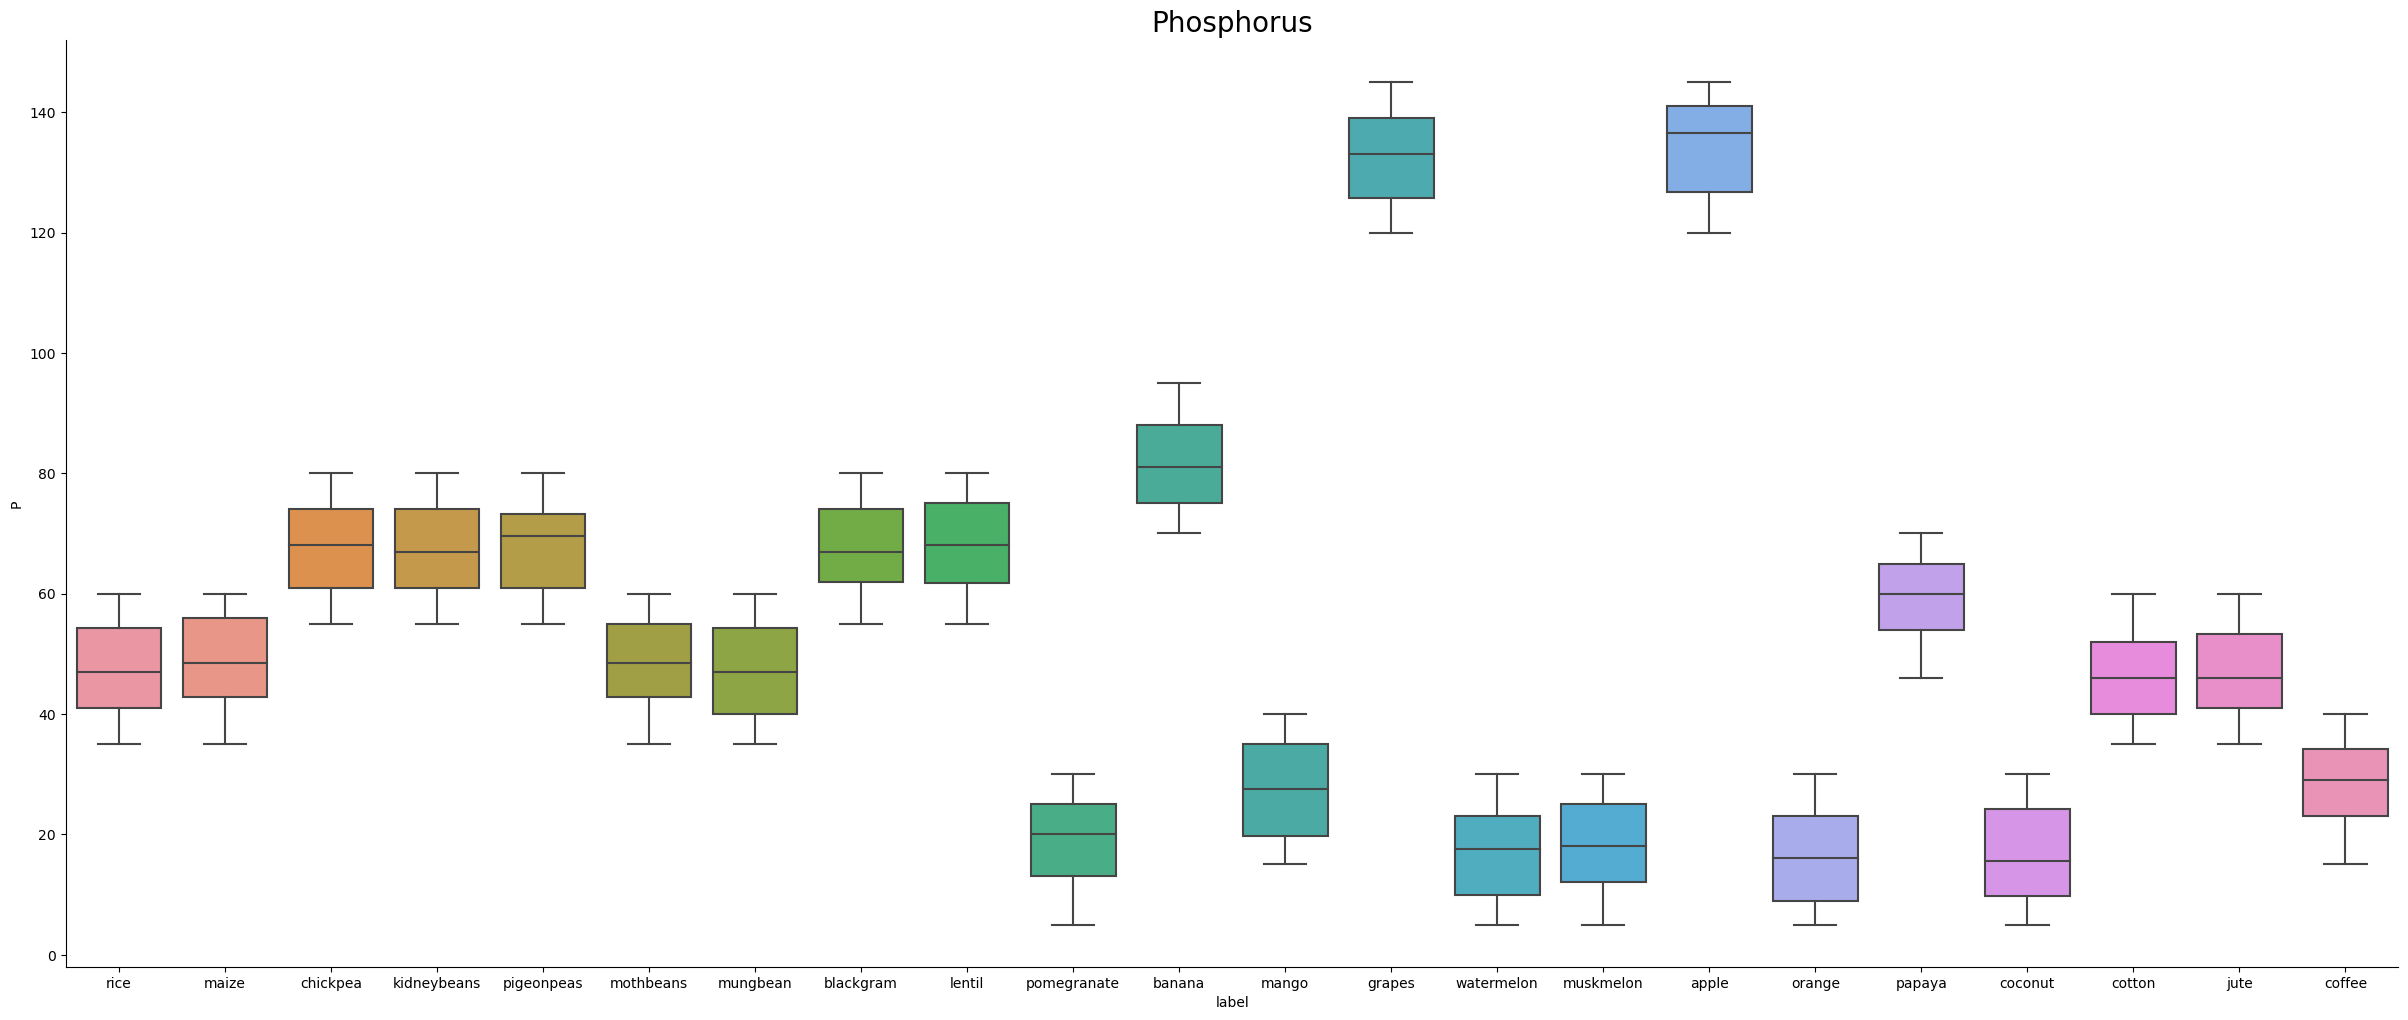

In [28]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

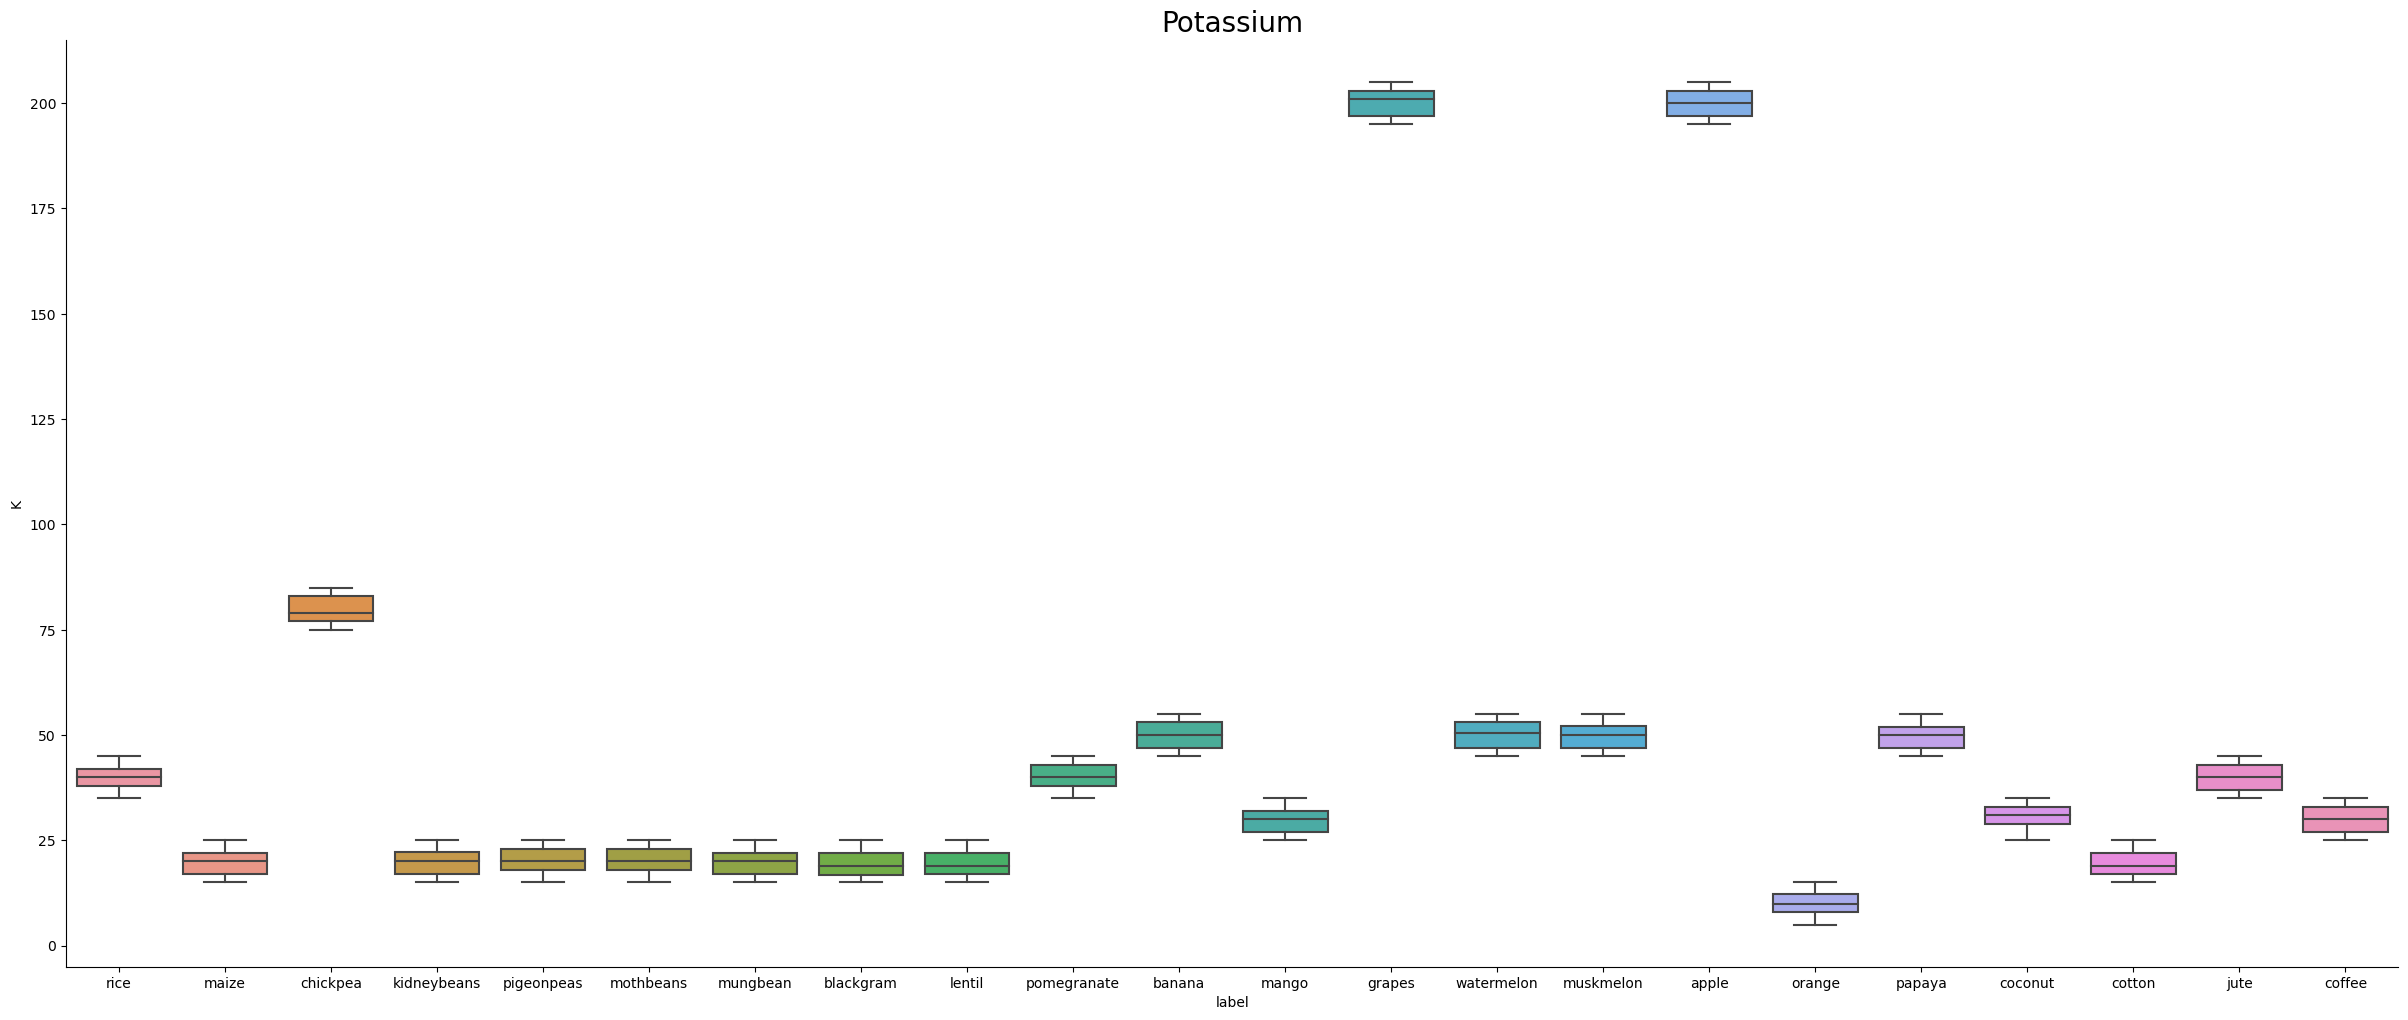

In [29]:
#how crops responded to Potassium
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

# PREPROCESSING 

## Outlier detection

In [30]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR) #Lower limit = (class boundary or class midpoint) - (half the width of the interval)
    upper_limit = q3 + (1.5*IQR) #Upper limit = (class boundary or class midpoint) + (half the width of the interval)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")


In [31]:
#finding if outliers exist in grapes             
detect_outlier(df['K'][df['label']=='grapes']) 

Lower limit: 188.0 Upper limit: 212.0
Minimum value: 195   MAximum Value: 205
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [32]:
#checking if outliers exist for crops due to Potassium
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - 

# FEATURE EXTRACTION

In [33]:
X = df.drop(['label'], axis=1) # our independent variable; removing the label as part of our data and saving the rest as x
Y= df['label'] #our dependent variable

In [34]:
X.head() #print the first 5 to confirm

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [35]:
Y.unique() #prints the different crops or target varaibles

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [36]:
print("Label length of independent variable: ",len(X)) #total X

Label length of independent variable:  2200


In [37]:
print("Label length of dependent or target variable: ",len(Y)) #total y

Label length of dependent or target variable:  2200


## Finding duplicates

In [38]:
df.duplicated().any() #checking for duplicate

False

## Normalizing data

In [39]:
#ENCODING CATEGORICAL DATA BECAUSE NOT ALL MACHINE LEARNING MODULE CAN HANDLE THAT 
#also for mathematical calculations, use the ecoded, whenever i need the categorical i will transform it 
encode = preprocessing.LabelEncoder() #creating an object or instance of LabelEncoder that will help us encode categorical variables into numerical variables
y = encode.fit_transform(Y) #transforming a categorical variable Y into numerical values and storing the result in a variable y
print(y) 

[20 20 20 ...  5  5  5]


## Spliting data into training and testing sets

In [40]:
#using the train_test_split function from the model_selection module in scikit-learn to split the dataset x and y into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.25, random_state=42) #default split parameters
print("the length of x train and test are: ", len(X_train),len(X_test), "\nThe length of the y_train and y_test are: ", len(X_test),len(y_test))

the length of x train and test are:  1650 550 
The length of the y_train and y_test are:  550 550


# Model Selection and Configurations for Hyperparameter Tuning

In [41]:
#defining a grid 
models={
    'decision tree' : {
        'model' : DecisionTreeClassifier(criterion='gini'),
        'params': {
            'decisiontreeclassifier__splitter':['best','random']
        }
    },
    
    
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    
   'k classifier':{
       'model':KNeighborsClassifier(),
       'params':{
           'kneighborsclassifier__n_neighbors':[5,10,20,25],
           'kneighborsclassifier__weights':['uniform','distance']
       }
   }
}

## Performing Hyperparameter Tuning and Model Evaluation Pipeline

In [42]:
# Define classification-specific scoring metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),  # Scoring metric for accuracy
    'Precision': make_scorer(precision_score, average='weighted'),  # Scoring metric for precision
    'Recall': make_scorer(recall_score, average='weighted'),  # Scoring metric for recall
    'F1-Score': make_scorer(f1_score, average='weighted'),  # Scoring metric for F1-score
}

# Lists to store results
results = []  # Store metrics for each model
details = []  # Store details of hyperparameter search for each model
best_estimators = {}  # Store the best estimators for each model

# Loop through each model configuration
for model_name, config in models.items():
    # Create a pipeline that includes data preprocessing and the specified model
    pipeline = make_pipeline(preprocessing.StandardScaler(), config['model'])

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = model_selection.GridSearchCV(
        pipeline, config['params'], cv=5, scoring=scoring, refit='Accuracy'  # Cross-validation with specified metrics
    )
    
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)  

    # Perform nested cross-validation on trained grid_search
    nested_scores = model_selection.cross_validate(
        grid_search, X_train, y_train, cv=5, scoring=scoring  # Nested cross-validation for evaluating the model
    )

    # Store results for the current model configuration
    results.append({
        'Model': model_name,
        'Best Accuracy': grid_search.best_score_,  # Best accuracy achieved during hyperparameter tuning
        'Best Params': grid_search.best_params_,  # Best hyperparameters found during tuning
        'Accuracy': nested_scores['test_Accuracy'].mean(),  # Average accuracy across cross-validation folds
        'Precision': nested_scores['test_Precision'].mean(),  # Average precision across cross-validation folds
        'Recall': nested_scores['test_Recall'].mean(),  # Average recall across cross-validation folds
        'F1-Score': nested_scores['test_F1-Score'].mean(),  # Average F1-score across cross-validation folds

    })
    

    details.append(pd.DataFrame(grid_search.cv_results_))  # Store details of hyperparameter search
    best_estimators[model_name] = grid_search.best_estimator_  # Store the best estimator found

# Create a DataFrame to display the results
result_df = pd.DataFrame(results)
# Print the results
result_df


Model  Best Accuracy  \
0  decision tree       0.990303   
1            svm       0.990303   
2  random_forest       0.992121   
3   k classifier       0.978182   

                                         Best Params  Accuracy  Precision  \
0       {'decisiontreeclassifier__splitter': 'best'}  0.986667   0.987651   
1              {'svc__C': 100, 'svc__kernel': 'rbf'}  0.987273   0.988749   
2       {'randomforestclassifier__n_estimators': 10}  0.993939   0.994317   
3  {'kneighborsclassifier__n_neighbors': 5, 'knei...  0.978182   0.981320   

     Recall  F1-Score  
0  0.986667  0.986600  
1  0.987273  0.987287  
2  0.993939  0.993909  
3  0.978182  0.978120

In [43]:
details[0] #checking the details of the best performing machine learning model

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.046956      0.008237         0.066538        0.005846   
1       0.023978      0.010612         0.055348        0.018536   

  param_decisiontreeclassifier__splitter  \
0                                   best   
1                                 random   

                                           params  split0_test_Accuracy  \
0    {'decisiontreeclassifier__splitter': 'best'}              0.993939   
1  {'decisiontreeclassifier__splitter': 'random'}              0.939394   

   split1_test_Accuracy  split2_test_Accuracy  split3_test_Accuracy  ...  \
0              0.987879              0.984848              0.996970  ...   
1              0.972727              0.975758              0.960606  ...   

   std_test_Recall  rank_test_Recall  split0_test_F1-Score  \
0         0.004454                 1              0.994003   
1         0.012914                 2              0.938671   

   split1_test_F1-Score  split2_test_F1-Score  split3_test_F1-Score  \
0              0.987869              0.984723              0.996966   
1              0.972074              0.975223              0.960239   

   split4_test_F1-Score  mean_test_F1-Score  std_test_F1-Score  \
0              0.987838            0.990280           0.004500   
1              0.966748            0.962591           0.012996   

   rank_test_F1-Score  
0                   1  
1                   2  

[2 rows x 38 columns]

In [44]:
details[1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
0       0.352870      0.010694         0.069136        0.006105            1   
1       0.220393      0.073880         0.034768        0.005264            1   
2       0.559079      0.101668         0.133875        0.076247           10   
3       0.354468      0.071023         0.068737        0.011184           10   
4       0.720327      0.304571         0.136073        0.030370          100   
5       0.434195      0.247815         0.068337        0.049448          100   
6       0.334486      0.032172         0.062343        0.012835         1000   
7       0.268350      0.026181         0.034967        0.005791         1000   

  param_svc__kernel                                     params  \
0               rbf        {'svc__C': 1, 'svc__kernel': 'rbf'}   
1            linear     {'svc__C': 1, 'svc__kernel': 'linear'}   
2               rbf       {'svc__C': 10, 'svc__kernel': 'rbf'}   
3            linear    {'svc__C': 10, 'svc__kernel': 'linear'}   
4               rbf      {'svc__C': 100, 'svc__kernel': 'rbf'}   
5            linear   {'svc__C': 100, 'svc__kernel': 'linear'}   
6               rbf     {'svc__C': 1000, 'svc__kernel': 'rbf'}   
7            linear  {'svc__C': 1000, 'svc__kernel': 'linear'}   

   split0_test_Accuracy  split1_test_Accuracy  split2_test_Accuracy  ...  \
0              0.990909              0.975758              0.981818  ...   
1              0.975758              0.984848              0.990909  ...   
2              0.987879              0.978788              0.987879  ...   
3              0.975758              0.984848              0.990909  ...   
4              0.990909              0.981818              0.990909  ...   
5              0.981818              0.987879              0.990909  ...   
6              0.984848              0.981818              0.984848  ...   
7              0.981818              0.987879              0.987879  ...   

   std_test_Recall  rank_test_Recall  split0_test_F1-Score  \
0         0.007323                 5              0.990899   
1         0.005214                 8              0.975923   
2         0.005555                 2              0.987976   
3         0.005620                 6              0.975923   
4         0.004454                 1              0.991003   
5         0.002969                 4              0.982001   
6         0.005071                 3              0.985041   
7         0.002424                 6              0.982001   

   split1_test_F1-Score  split2_test_F1-Score  split3_test_F1-Score  \
0              0.975725              0.981890              0.996966   
1              0.984733              0.990844              0.987825   
2              0.978746              0.987740              0.993912   
3              0.984825              0.990844              0.987861   
4              0.981794              0.990891              0.993912   
5              0.987858              0.990844              0.987861   
6              0.981794              0.984670              0.993912   
7              0.987858              0.987817              0.987861   

   split4_test_F1-Score  mean_test_F1-Score  std_test_F1-Score  \
0              0.984624            0.986021           0.007330   
1              0.987659            0.985397           0.005116   
2              0.993912            0.988457           0.005560   
3              0.990869            0.986064           0.005542   
4              0.993912            0.990303           0.004456   
5              0.987860            0.987285           0.002884   
6              0.993912            0.987866           0.005063   
7              0.984806            0.986069           0.002350   

   rank_test_F1-Score  
0                   7  
1                   8  
2                   2  
3                   6  
4                   1  
5                   4  
6                   3  
7               

In [45]:
details[2]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.024977      0.001548         0.033968        0.000632   
1       0.070934      0.017002         0.039963        0.006657   
2       0.124883      0.010516         0.047556        0.008229   

  param_randomforestclassifier__n_estimators  \
0                                          1   
1                                          5   
2                                         10   

                                         params  split0_test_Accuracy  \
0   {'randomforestclassifier__n_estimators': 1}              0.948485   
1   {'randomforestclassifier__n_estimators': 5}              0.984848   
2  {'randomforestclassifier__n_estimators': 10}              0.987879   

   split1_test_Accuracy  split2_test_Accuracy  split3_test_Accuracy  ...  \
0              0.951515              0.936364              0.912121  ...   
1              0.978788              0.981818              0.993939  ...   
2              1.000000              0.990909              0.990909  ...   

   std_test_Recall  rank_test_Recall  split0_test_F1-Score  \
0         0.013873                 3              0.947872   
1         0.005214                 2              0.984794   
2         0.004111                 1              0.987865   

   split1_test_F1-Score  split2_test_F1-Score  split3_test_F1-Score  \
0              0.950810              0.936017              0.911137   
1              0.978764              0.981698              0.993804   
2              1.000000              0.990785              0.990906   

   split4_test_F1-Score  mean_test_F1-Score  std_test_F1-Score  \
0              0.934883            0.936144           0.013997   
1              0.981632            0.984139           0.005196   
2              0.990875            0.992086           0.004123   

   rank_test_F1-Score  
0                   3  
1                   2  
2                   1  

[3 rows x 38 columns]

In [46]:
details[3]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.428601      0.792342         0.427001        0.605306   
1       0.030172      0.011895         0.054550        0.007439   
2       0.020781      0.007104         0.087518        0.017779   
3       0.017982      0.001095         0.045358        0.001199   
4       0.018782      0.000979         0.082922        0.002188   
5       0.016385      0.002058         0.045957        0.001998   
6       0.016585      0.000489         0.083322        0.002152   
7       0.018782      0.002225         0.050553        0.004450   

  param_kneighborsclassifier__n_neighbors param_kneighborsclassifier__weights  \
0                                       5                             uniform   
1                                       5                            distance   
2                                      10                             uniform   
3                                      10                            distance   
4                                      20                             uniform   
5                                      20                            distance   
6                                      25                             uniform   
7                                      25                            distance   

                                              params  split0_test_Accuracy  \
0  {'kneighborsclassifier__n_neighbors': 5, 'knei...              0.978788   
1  {'kneighborsclassifier__n_neighbors': 5, 'knei...              0.981818   
2  {'kneighborsclassifier__n_neighbors': 10, 'kne...              0.954545   
3  {'kneighborsclassifier__n_neighbors': 10, 'kne...              0.960606   
4  {'kneighborsclassifier__n_neighbors': 20, 'kne...              0.918182   
5  {'kneighborsclassifier__n_neighbors': 20, 'kne...              0.936364   
6  {'kneighborsclassifier__n_neighbors': 25, 'kne...              0.921212   
7  {'kneighborsclassifier__n_neighbors': 25, 'kne...              0.936364   

   split1_test_Accuracy  split2_test_Accuracy  ...  std_test_Recall  \
0              0.966667              0.969697  ...         0.008441   
1              0.966667              0.969697  ...         0.008866   
2              0.960606              0.960606  ...         0.009271   
3              0.960606              0.969697  ...         0.009271   
4              0.936364              0.948485  ...         0.013195   
5              0.945455              0.954545  ...         0.011076   
6              0.927273              0.939394  ...         0.008656   
7              0.939394              0.945455  ...         0.009506   

   rank_test_Recall  split0_test_F1-Score  split1_test_F1-Score  \
0                 2              0.978968              0.966520   
1                 1              0.981966              0.966520   
2                 4              0.953297              0.960462   
3                 3              0.960471              0.960462   
4                 7              0.914613              0.935841   
5                 5              0.934209              0.945336   
6                 8              0.917393              0.925480   
7                 6              0.933878              0.938746   

   split2_test_F1-Score  split3_test_F1-Score  split4_test_F1-Score  \
0              0.969674              0.990906              0.975326   
1              0.969674              0.990906              0.981534   
2              0.960362              0.981872              0.963314   
3              0.969857              0.984909              0.975465   
4              0.948244              0.957300              0.938744   
5              0.954711              0.969533              0.953791   
6              0.938450              0.944416              0.928414   
7              0.945213              0.963407              0.947630   

   mean_test_F1-Score  std_test_F1-Score  rank_test_F1-Score  
0            0.9762

In [47]:
results #print the whole score 

[{'Model': 'decision tree',
  'Best Accuracy': 0.9903030303030305,
  'Best Params': {'decisiontreeclassifier__splitter': 'best'},
  'Accuracy': 0.9866666666666667,
  'Precision': 0.9876507646120649,
  'Recall': 0.9866666666666667,
  'F1-Score': 0.9865995963885504},
 {'Model': 'svm',
  'Best Accuracy': 0.9903030303030305,
  'Best Params': {'svc__C': 100, 'svc__kernel': 'rbf'},
  'Accuracy': 0.9872727272727273,
  'Precision': 0.988748514557338,
  'Recall': 0.9872727272727273,
  'F1-Score': 0.9872874846621663},
 {'Model': 'random_forest',
  'Best Accuracy': 0.9921212121212122,
  'Best Params': {'randomforestclassifier__n_estimators': 10},
  'Accuracy': 0.9939393939393939,
  'Precision': 0.994317092493563,
  'Recall': 0.9939393939393939,
  'F1-Score': 0.9939090076861337},
 {'Model': 'k classifier',
  'Best Accuracy': 0.9781818181818182,
  'Best Params': {'kneighborsclassifier__n_neighbors': 5,
   'kneighborsclassifier__weights': 'distance'},
  'Accuracy': 0.9781818181818182,
  'Precision':

In [48]:
pd.DataFrame(results) #creating a datafram for score

Model  Best Accuracy  \
0  decision tree       0.990303   
1            svm       0.990303   
2  random_forest       0.992121   
3   k classifier       0.978182   

                                         Best Params  Accuracy  Precision  \
0       {'decisiontreeclassifier__splitter': 'best'}  0.986667   0.987651   
1              {'svc__C': 100, 'svc__kernel': 'rbf'}  0.987273   0.988749   
2       {'randomforestclassifier__n_estimators': 10}  0.993939   0.994317   
3  {'kneighborsclassifier__n_neighbors': 5, 'knei...  0.978182   0.981320   

     Recall  F1-Score  
0  0.986667  0.986600  
1  0.987273  0.987287  
2  0.993939  0.993909  
3  0.978182  0.978120

## True accuracy 

In [49]:
#printing the results using the key
for i in best_estimators.keys():
    print(f'{i} : {best_estimators[i].score(X_test,y_test)}')

decision tree : 0.9836363636363636
svm : 0.9709090909090909
random_forest : 0.9836363636363636
k classifier : 0.9618181818181818


PREDICTION WITH BEST MODEL

In [50]:
#use the best machine learning model to predict our text data
y_pred = best_estimators['random_forest'].predict(X_test)

CLASSIFICATION REPORT

In [51]:
#inverse transform from numerical data to categorical data to see the crops and not their numerical representation
print(classification_report(encode.inverse_transform(y_test), encode.inverse_transform(y_pred)))

ValueError: y contains previously unseen labels: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']

CONFUSION MATRIX OF BEST MODEL

In [ ]:
#constructing a confusion matrix of the y_test and predicted
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) #generate a heatmap of the created confusion matrix of the y_test and the predict
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

ROC AUC

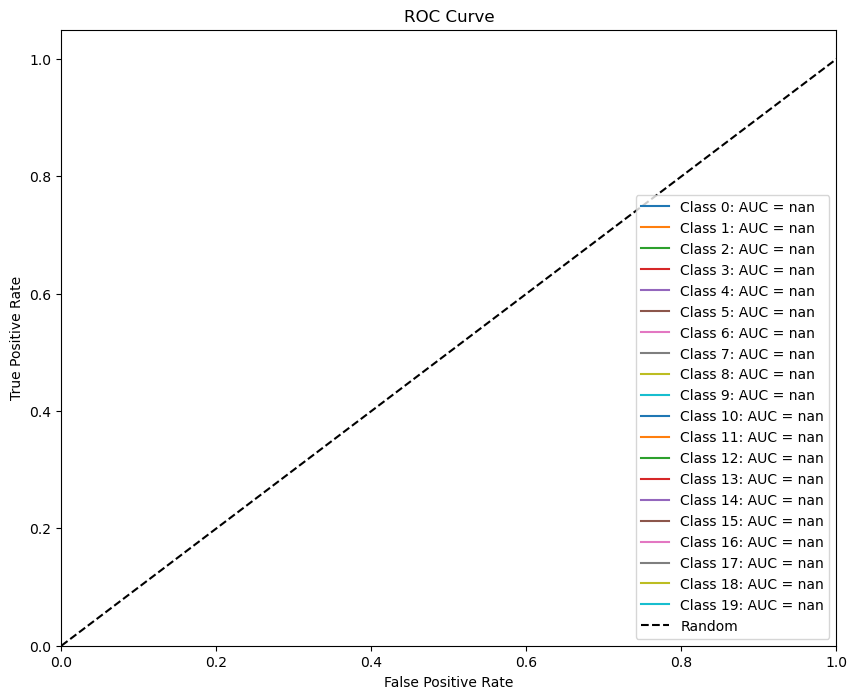

In [52]:
# Predict class probabilities using predict_proba
y_probs = best_estimators['random_forest'].predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(20))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range((20)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


PREDICTION

In [ ]:
# data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) 
yP = grid_search.predict(data)
encode.inverse_transform(yP)

# USING AN ENSEMBLE FOR MORE ACCURACY

## BAGGING OR BOOSTRAP AGGREGATING CLASSIFIER

Base Models: Bagging involves training multiple instances of the same base model on different subsets of the training data. Each instance is trained on a randomly sampled subset with replacement (bootstrap samples).

Parallelism: The base models in bagging are trained in parallel, which makes it suitable for parallel computing environments.

Aggregation: For classification problems, bagging aggregates the predictions using majority voting (mode of class labels). For regression problems, it aggregates the predictions using the mean (average) of individual model predictions.

Example Algorithms: Random Forest is a popular bagging algorithm that uses decision trees as base models. Each tree is trained on a different subset of the data.

Purpose: Bagging reduces variance and overfitting by combining predictions from multiple models trained on diverse subsets of the data.

# Creating and Training a Bagging Classifier Ensemble with Random Forest Base Estimators

In [ ]:
#creating a pipeline with make_pipeline to chain together multiple data preprocising
#StandardScalr()  standardizes the input data by subtracting the mean and scaling to unit variance
#RandomForestClassifier is a machine learning model that constructs multiple decision trees on randomly selected subsets of the training data and aggregates their predictions to make a final prediction
pipe1 = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators = 10)) #

# BaggingClassifier trains multiple instances of a base estimator (such as a decision tree, k-nearest neighbors, or logistic regression) on different subsets of the training data and aggregates their predictions to make a final prediction.
bag_model = BaggingClassifier(base_estimator=pipe1,n_estimators=100,
                              oob_score=True,random_state=0, max_samples=0.8)

#repeated this because i am not using svm or knn, and bagging can handle categorical data
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y, test_size=0.25, random_state=42) #default split parameters

bag_model.fit(X_train,y_train) #training the module

In [ ]:
y_pred_bg = bag_model.predict(X_test) #would generate predicted labels for the test data x_test using the BaggingClassifier model that was trained earlier.

In [ ]:
#calculating the score
bg_score = bag_model.score(X_test, y_test) #bag_model.score(x_test,y_test) would calculate the mean accuracy of the BaggingClassifier model on the test data x_test and y_test
bg_score

In [ ]:
#calculating the score
bg_score = accuracy_score(y_test, y_pred_bg) #bag_model.score(x_test,y_test) would calculate the mean accuracy of the BaggingClassifier model on the test data x_test and y_test
bg_score

CLASSIFICATION REPORT BAGGING

In [ ]:
#inverse transform from numerical data to categorical data to see the crops and not their numerical representation
print(classification_report((y_test), (y_pred_bg)))

CONFUSION MATRIX FOR BAGGING

In [ ]:
#constructing a confusion matrix of the y_test and predicted
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(confusion_matrix((y_test), (y_pred_bg)),annot=True) #generate a heatmap of the created confusion matrix of the y_test and the predict
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

ROC AUC BAGGING

In [ ]:
# Predict class probabilities using predict_proba
y_probs_bg = bag_model.predict_proba(X_test)

# Binarize the labels
y_test_binarized_bg = label_binarize(y_test, classes=range(20))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range((20)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized_bg[:, i], y_probs_bg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


PREDICTION 

In [ ]:
# data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) 
yP = bag_model.predict(data)
# encode.inverse_transform(yP)
yP

In [ ]:
#final score of bagging classifier

In [ ]:
accuracy = accuracy_score(y_test, y_pred_bg)
accuracy

## VOTING CLASSIFIER 

Base Models: Voting involves training multiple different base models on the same training data.

Combination: In classification problems, a voting classifier combines the predictions of its individual base models to make the final prediction. It can use different strategies, such as majority voting (hard voting) or weighted average of class probabilities (soft voting).

Example Algorithms: A voting classifier can combine predictions from diverse algorithms, such as Decision Trees, Support Vector Machines (SVM), and k-Nearest Neighbors (k-NN).

Purpose: Voting is used to improve generalization and robustness by combining predictions from different models that may have complementary strengths.

When using "hard" voting, the final prediction is based on the majority class predicted by the base models. When using "soft" voting, the final prediction is based on the class probabilities (confidence) predicted by the base models.

## Creating and Training a Voting Classifier Ensemble for Multiple Classification Algorithms

In [ ]:
# Define individual classifiers
clf1 = DecisionTreeClassifier(criterion='gini', splitter='best')
clf2 = SVC(gamma='auto', kernel='rbf', probability=True)
clf3 = RandomForestClassifier(n_estimators=10)
clf4 = KNeighborsClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('dt', clf1), ('svm', clf2), ('rf', clf3), ('knn', clf4)],
    voting='soft'  # Use majority voting
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

In [ ]:
# Evaluate the voting classifier
vc_score = voting_clf.score(X_test, y_test)

In [ ]:
# Make predictions using the voting classifier
y_predicted_vclf = voting_clf.predict(X_test)

In [ ]:
print("Voting Classifier Score:", vc_score)


CLASSIFICATION REPORT

In [ ]:
# Print the classification report
print(classification_report(y_test, y_predicted_vclf))
# print(classification_report(encode.inverse_transform(y_test), encode.inverse_transform(y_predicted_vclf)))

CONFUSION MATRIX

In [ ]:
#constructing a confusion matrix of the y_test and predicted
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(confusion_matrix(y_test, y_predicted_vclf),annot=True) #generate a heatmap of the created confusion matrix of the y_test and the predict
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

ROC AUC

In [ ]:
#encode Y before running this code

In [ ]:
## Predict class probabilities using predict_proba
y_probs_vclf = voting_clf.predict_proba(X_test)

# Binarize the labels
y_test_binarized_vclf = label_binarize(y_test, classes=range(20))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range((20)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized_vclf[:, i], y_probs_vclf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


PREDICTION

In [ ]:
# data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) 
yP = voting_clf.predict(data)
# encode.inverse_transform(yP)
yP

## SAVING THE TRAINED MODEL 

In [ ]:
from joblib import dump
dump(bag_model, 'bagging_classifier.joblib')

# y_test_enc = encode.fit_transform(y_test)

np.save('y_test', y_test)
np.save('X_test', X_test)
print(len(y_test))
print(len(y_test))

In [ ]:
import pickle
with open('X_test.pk1', 'wb') as f:
    pickle.dump(X_test, f)
    
with open('y_test.pk1', 'wb') as f:
    pickle.dump(y_test, f)

## TESTING OUR RECOMMENDER SYSTEM DIRECTLY 

## using input from user

In [ ]:
import numpy as np
import pandas as pd

# get input data from the user
N = float(input("Enter the value of N: "))
P = float(input("Enter the value of P: "))
K = float(input("Enter the value of K: "))
temperature = float(input("Enter the temperature: "))
humidity = float(input("Enter the humidity: "))
ph = float(input("Enter the pH level: "))
rainfall = float(input("Enter the rainfall: "))

# create a DataFrame with the user input and set the column names
data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# make a prediction using the input data
prediction = bag_model.predict(data)

# decoded_data = encode.inverse_transform(prediction)


# print the prediction
print('The recommended crop to be grown is: ', prediction)

#### series of predictions hard coded

In [ ]:
data = np.array([[89,67, 30, 43, 60, 5, 80]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction)

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction)

In [ ]:
data = np.array([[30,3, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
#convert it back to categorical
# print(encode.inverse_transform(prediction)) #output field to print back our data
prediction

In [ ]:
data = np.array([[60,70, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

In [ ]:
data = np.array([[99,34, 32, 90, 90, 32, 34]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

In [ ]:
data = np.array([[34,4, 34, 3, 3, 3, 5]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

## predicting using the save trained model which will be used in a application

In [ ]:
from joblib import load

bag_model_saved = load('bagging_classifier.joblib')


In [ ]:
# get input data from the user
N = float(input("Enter the value of N: "))
P = float(input("Enter the value of P: "))
K = float(input("Enter the value of K: "))
temperature = float(input("Enter the temperature: "))
humidity = float(input("Enter the humidity: "))
ph = float(input("Enter the pH level: "))
rainfall = float(input("Enter the rainfall: "))

# create a DataFrame with the user input and set the column names
data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# make a prediction using the input data
prediction = bag_model_saved.predict(data)

# print the prediction
# print(encode.inverse_transform(prediction))
prediction

## series of prediction on the tranined model

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) 

data = np.array([[30,3, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[60,70, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[99,34, 32, 90, 90, 32, 34]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[34,4, 34, 3, 3, 3, 5]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[34,4, 34, 3, 33, 18, 34]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction)